In [1]:
# importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# leemos el csv a un pandas df
# https://datamarket.com/data/list/?q=provider:tsdl
milk_prod_pounds = pd.read_csv("monthly-milk-production-pounds-p.csv", sep = ',', header=0)

In [3]:
# renombramos una columna
milk_prod_pounds.rename(columns = {'Monthly milk production: pounds per cow. Jan 62 ? Dec 75': 'Milk_prod'}, 
                       inplace= True)

In [4]:
milk_prod_pounds.head()

Month  Milk_prod
0  1962-01        589
1  1962-02        561
2  1962-03        640
3  1962-04        656
4  1962-05        727

In [5]:
# hacemos de 'Month' el índice
#milk_prod_pounds.set_index('Month', inplace =True)

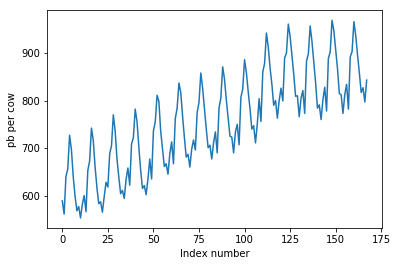

In [6]:
# ploteamos la serie
plt.plot(milk_prod_pounds['Milk_prod'])
#plt.xticks(rotation=90)
plt.xlabel('Index number')
plt.ylabel('pb per cow')
plt.show()

In [7]:
# Cálculo de la media móvil
moving_avg = milk_prod_pounds['Milk_prod'].rolling(window=12,center=False).mean()
# la ventana contiene 12 puntos

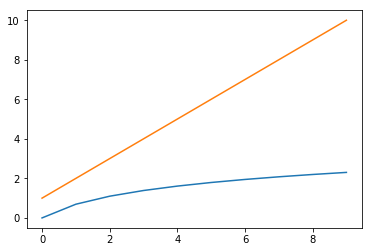

In [8]:
# Podemos trabajar también con el logaritmo del dato
#(varianza más estable -> estacionaridad
# la distribución de datos es más normal)
x= [i+1 for i in range(10)]
plt.plot(np.log(x))
plt.plot(x)
plt.show()

In [12]:
milk_prod_pounds['log']= np.log(milk_prod_pounds['Milk_prod'].values)
moving_avg_log = milk_prod_pounds['log'].rolling(window=12,center=False).mean()

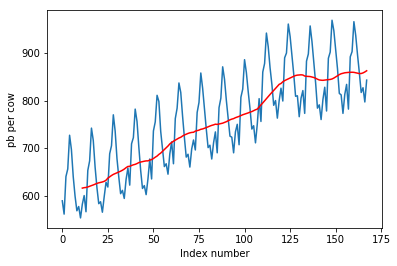

In [17]:
# plotear el dato original y la media móvil
plt.plot(milk_prod_pounds['Milk_prod'])
plt.xlabel('Index number')
plt.ylabel('pb per cow')
plt.plot(moving_avg, color='red')
plt.show()

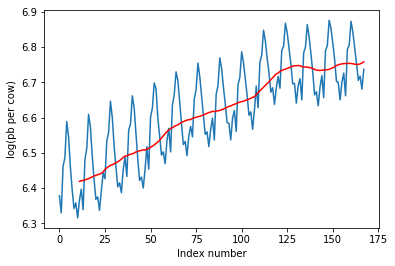

In [18]:
# Hacemos lo mismo con el logaritmo
moving_avg_log = milk_prod_pounds['log'].rolling(window=12,center=False).mean()
plt.plot(milk_prod_pounds['log'])
plt.plot(moving_avg_log, color='red')
plt.xlabel('Index number')
plt.ylabel('log(pb per cow)')
plt.show()

### Estacionaridad

#### Ventanas deslizantes de la media y desviación típica

In [20]:
#calculo de la rolling media y std
roll_mean = milk_prod_pounds['Milk_prod'].rolling(window=12,center=False).mean() # esta es la media móvil!
roll_std = milk_prod_pounds['Milk_prod'].rolling(window=12,center=False).std()

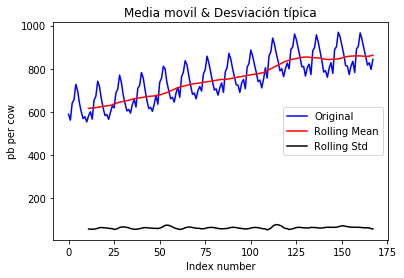

In [21]:
#Plot:
plt.plot(milk_prod_pounds['Milk_prod'], color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.xlabel('Index number')
plt.ylabel('pb per cow')
plt.title('Media móvil & Desviación típica')
plt.show(block=False)

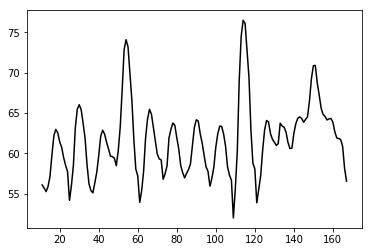

In [25]:
# plotear sólo la std
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.show()

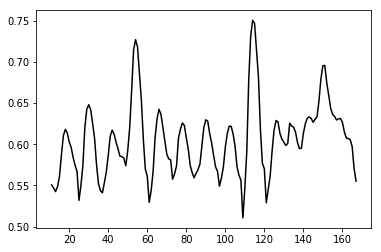

In [26]:
#variación relativa
plt.plot(roll_std/np.std(milk_prod_pounds['Milk_prod']), color='black', label = 'Rolling Std')
plt.show()

In [13]:
#calculo de la rolling media y std para el log
roll_mean_log = milk_prod_pounds['log'].rolling(window=12,center=False).mean() # esta es la media móvil!
roll_std_log = milk_prod_pounds['log'].rolling(window=12,center=False).std()

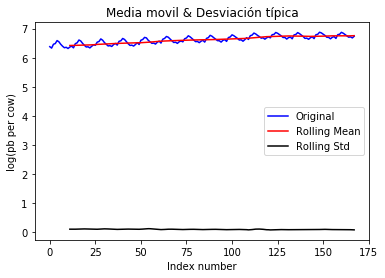

In [18]:
#Plot:
plt.plot(milk_prod_pounds['log'], color='blue',label='Original')
plt.plot(roll_mean_log, color='red', label='Rolling Mean')
plt.plot(roll_std_log, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.xlabel('Index number')
plt.ylabel('log(pb per cow)')
plt.title('Media movil & Desviación típica')
plt.show(block=False)

In [ ]:
# el logaritmo se comporta más suavemente

#### Dickey-Fuller test

In [35]:
from statsmodels.tsa.stattools import adfuller

In [42]:
dftest = adfuller(milk_prod_pounds['Milk_prod'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic','p-value','#Lags usados','Numero de observaciones'])
for key,value in dftest[4].items():
    dfoutput['Valor crítico del Test Statistic (%s)'%key] = value
print(dfoutput)

ADF Test Statistic                         -1.303812
p-value                                     0.627427
#Lags usados                               13.000000
Numero de observaciones                   154.000000
Valor crítico del Test Statistic (1%)      -3.473543
Valor crítico del Test Statistic (5%)      -2.880498
Valor crítico del Test Statistic (10%)     -2.576878
dtype: float64


In [ ]:
# Significance level: 5%
# Notar que el p-value es MAYOR que el 5% = 0.05, con lo que NO rechazamos la hipótesis nula
# Otra manera de verlo: El valor crítico a 5% es ADF = -2.880498, mientras que nuestro AFD = -1.303812

### Hacer estacionaria una serie temporal

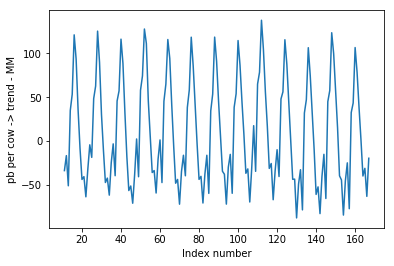

In [19]:
# Eliminamos la componente trend (la media móvil)
# S = T + C + r
plt.plot(milk_prod_pounds['Milk_prod'] - moving_avg) # restamos
plt.ylabel('pb per cow -> trend - MM')
plt.xlabel('Index number')
plt.show()

#### Diferenciación

In [73]:
diff_ser = milk_prod_pounds['Milk_prod'] -milk_prod_pounds['Milk_prod'].shift()

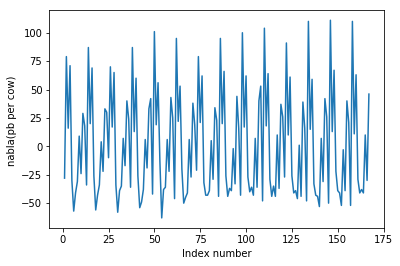

In [74]:
plt.plot(diff_ser)
plt.ylabel('nabla(pb per cow)')
plt.xlabel('Index number')
plt.show()

In [75]:
# segunda diferenciación
diff_ser2 = diff_ser - diff_ser.shift()

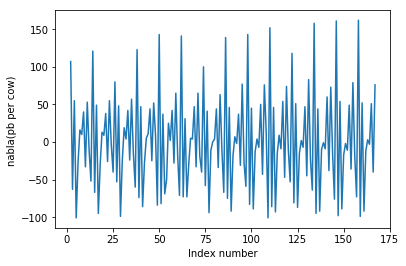

In [76]:
plt.plot(diff_ser2)
plt.ylabel('nabla^2(pb per cow)')
plt.xlabel('Index number')
plt.show()

In [77]:
# tercera diferenciación
diff_ser3 = diff_ser2 -diff_ser2.shift()

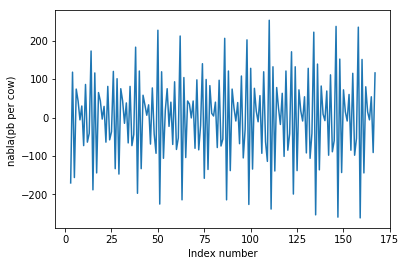

In [78]:
plt.plot(diff_ser3)
plt.ylabel('nabla^3(pb per cow)')
plt.xlabel('Index number')
plt.show()

### Componentes de una serie temporal

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/luismelgar/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
decomposition = seasonal_decompose(milk_prod_pounds['Milk_prod'].values, freq=12)

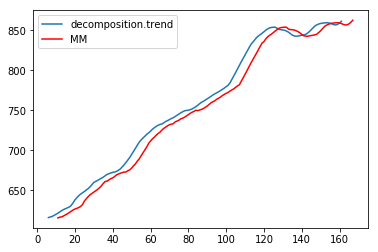

In [11]:
# comparación entre el trend y la media móvil
plt.plot(decomposition.trend, label='decomposition.trend')
plt.plot(moving_avg, color='red',label='MM')
plt.legend(loc='best')
plt.show()

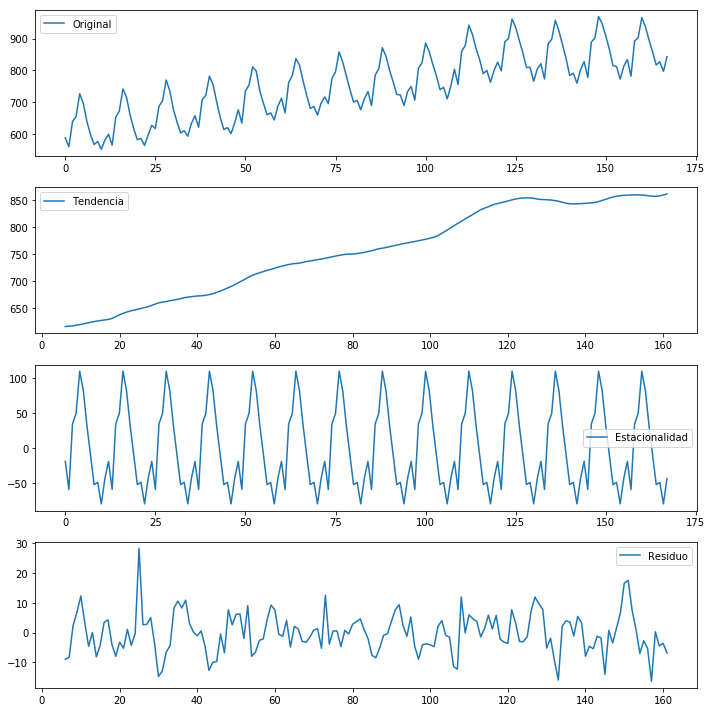

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.subplot(411)
plt.plot(milk_prod_pounds['Milk_prod'].values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()

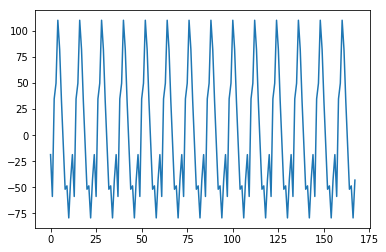

In [51]:
# Componente estacional
plt.plot(decomposition.seasonal)
plt.show()

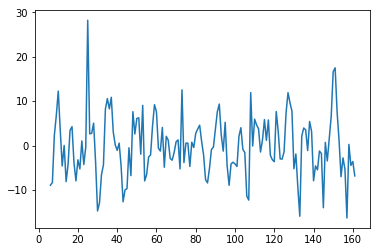

In [52]:
# componente residuo
plt.plot(decomposition.resid)
plt.show()

In [14]:
#quitamos los NaNs
residual = decomposition.resid[~np.isnan(decomposition.resid)]

In [60]:
# ¿Es el residuo estacionario?
dftest = adfuller(residual, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic','p-value','#Lags usados','Numero de observaciones'])
for key,value in dftest[4].items():
    dfoutput['Valor crítico del Test Statistic (%s)'%key] = value
print(dfoutput)

ADF Test Statistic                         -4.353371
p-value                                     0.000359
#Lags usados                               11.000000
Numero de observaciones                   144.000000
Valor crítico del Test Statistic (1%)      -3.476598
Valor crítico del Test Statistic (5%)      -2.881829
Valor crítico del Test Statistic (10%)     -2.577589
dtype: float64


### Autocorrelación

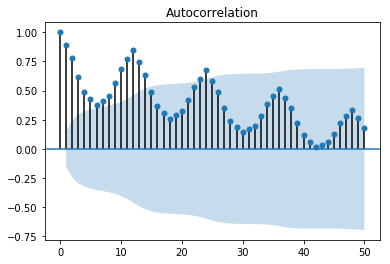

In [112]:
#ACF de serie original
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(milk_prod_pounds['Milk_prod'].values, lags=50)
plt.show()

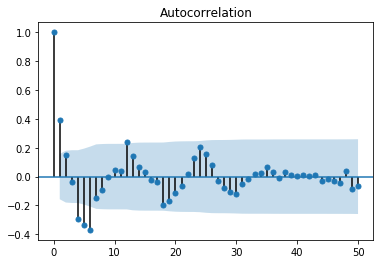

In [22]:
#ACF del residuo
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(decomposition.resid[~np.isnan(decomposition.resid)], lags=50)
plt.show()

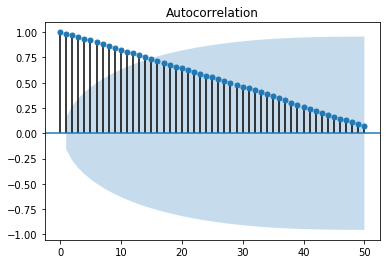

In [121]:
# ACF del trend
plot_acf(decomposition.trend[~np.isnan(decomposition.trend)], lags=50)
plt.show()

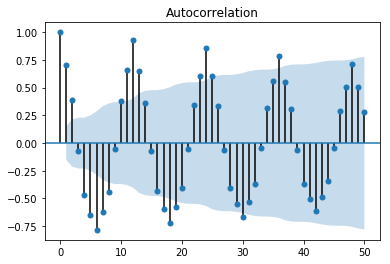

In [122]:
# ACF de la parte estacional
plot_acf(decomposition.seasonal[~np.isnan(decomposition.seasonal)], lags=50)
plt.show()

In [123]:
from statsmodels.graphics.tsaplots import plot_pacf

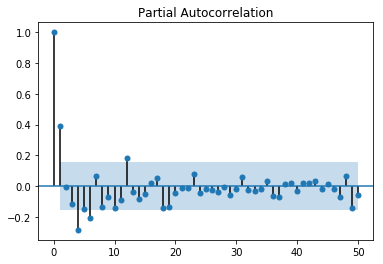

In [130]:
plot_pacf(decomposition.resid[~np.isnan(decomposition.resid)], lags=50, alpha=.05)
plt.show()

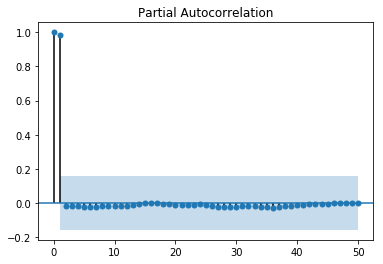

In [125]:
plot_pacf(decomposition.trend[~np.isnan(decomposition.trend)], lags=50)
plt.show()

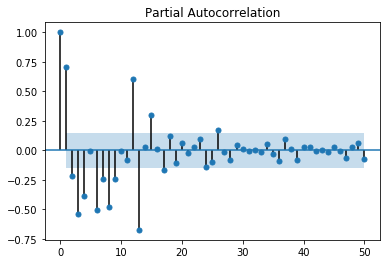

In [126]:
plot_pacf(decomposition.seasonal[~np.isnan(decomposition.seasonal)], lags=50)
plt.show()

### Componente estacional

In [61]:
import datetime as dt

In [62]:
milk_prod_pounds_dt = milk_prod_pounds.copy()

In [63]:
milk_prod_pounds_dt['Month'] = milk_prod_pounds['Month'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m'))

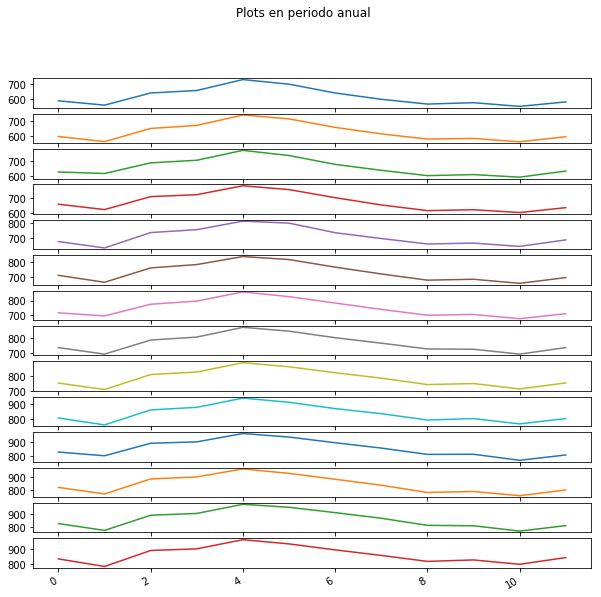

In [64]:
#from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
#from matplotlib import pyplot
series = milk_prod_pounds_dt.set_index('Month')['Milk_prod']
#groups = series.groupby(TimeGrouper('A'))
groups = series.groupby(pd.Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False,figsize=(10, 10), title = 'Plots en periodo anual')
plt.show()

### Modelo ARIMA

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
model_milk = ARIMA(decomposition.resid[~np.isnan(decomposition.resid)], order=(5,1,0))

In [13]:
model_fit = model_milk.fit(disp=0)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  155
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -516.303
Method:                       css-mle   S.D. of innovations              6.759
Date:                Tue, 08 Jan 2019   AIC                           1046.606
Time:                        22:17:30   BIC                           1067.910
Sample:                             1   HQIC                          1055.259
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.274     -0.071      0.943      -0.556       0.517
ar.L1.D.y     -0.3645      0.080     -4.584      0.000      -0.520      -0.209
ar.L2.D.y     -0.1723      0.084     -2.062      0.0

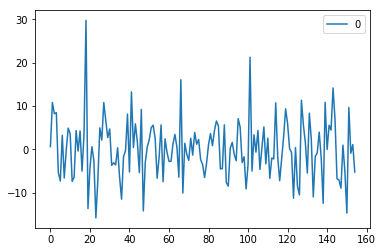

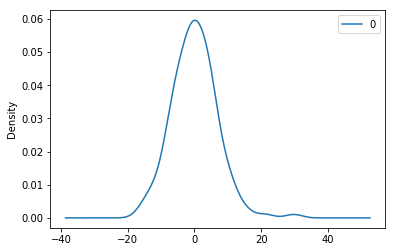

                0
count  155.000000
mean     0.058041
std      6.788415
min    -15.840589
25%     -4.495360
50%      0.193328
75%      4.280511
max     29.800510


In [21]:
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

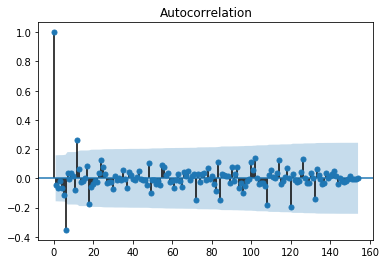

In [24]:
plot_acf(model_fit.resid)
plt.show()

### Test de autocorrelaciones

In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [51]:
LBBP_df = pd.DataFrame(np.column_stack(acorr_ljungbox(model_fit.resid,boxpierce=True,  lags=15)),
             columns=['LB_statistic','LB_pvalue', 'BP_statistic','BP_pvalue'])

In [52]:
LBBP_df

LB_statistic  LB_pvalue  BP_statistic  BP_pvalue
0       0.380640   0.537261      0.373367   0.541175
1       1.148969   0.562995      1.122121   0.570604
2       1.189789   0.755454      1.161641   0.762218
3       1.848868   0.763531      1.795531   0.773300
4       3.898661   0.564097      3.753933   0.585359
5      24.303415   0.000459     23.118954   0.000758
6      24.514922   0.000925     23.318336   0.001500
7      24.525232   0.001870     23.327990   0.002968
8      24.716342   0.003302     23.505710   0.005155
9      24.773568   0.005792     23.558562   0.008862
10     25.934059   0.006638     24.622961   0.010348
11     37.512563   0.000184     35.168987   0.000440
12     38.165988   0.000271     35.759983   0.000646
13     38.276025   0.000471     35.858806   0.001095
14     38.341878   0.000803     35.917528   0.001817

## Forecast con ARIMA

In [32]:
def training_test_split(series, perc):
    
    indx_limit = round(len(series)*perc)
    
    return list(series[:indx_limit]), list(series[indx_limit:])

In [33]:
residual = decomposition.resid[~np.isnan(decomposition.resid)]

In [34]:
train_s, test_s = training_test_split(residual, 0.7)

In [35]:
forecast_l =[]
for time_t in range(len(test_s)):
    forecast_milk = ARIMA(train_s, order=(5,1,0))
    forecast_fit = forecast_milk.fit(disp=0)
    output_forecast = forecast_fit.forecast()[0] # forecast a t+1
    
    forecast_l.append(output_forecast) #añadimos el forecast
    train_s.append(test_s[time_t]) # añadimos el punto

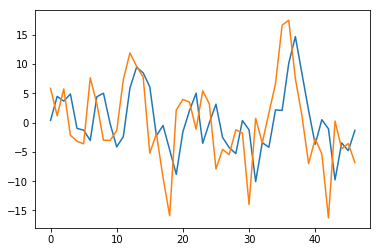

In [38]:
plt.plot(forecast_l)
plt.plot(test_s)
plt.show()

In [44]:
# MSE del forecast
def MSE_forecast(predicted_for, real_for):
    return np.sqrt(np.sum([(predicted_for[i]-real_for[i])**2 for i in range(len(real_for))]))/len(real_for)

In [50]:
MSE_forecast(forecast_l, test_s)/abs(np.mean(test_s))

12.978407729050261